# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from scipy.optimize import minimize
%matplotlib inline
from scipy.misc import derivative
from sympy import *
from scipy.optimize import dual_annealing
from scipy.optimize import differential_evolution
from scipy.optimize import basinhopping
from random import choices

## Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
# Функция для определения угла в раданах между векторами
def cos_angle (vector_1, vector_2):
    return (np.dot(vector_1, vector_2) / (LA.norm(vector_1) * LA.norm(vector_2)))

In [4]:
for item_1 in range(len(raitings)):
    value = 0
    for item_2 in range(len(raitings)):
        if item_1 != item_2:
            new_cos_angle = cos_angle(raitings[item_1], raitings[item_2])
            if new_cos_angle > value:
                value = new_cos_angle
                user = item_2           
    print(f'На пользователя {item_1} наиболее похож пользователь {user}.')

На пользователя 0 наиболее похож пользователь 8.
На пользователя 1 наиболее похож пользователь 4.
На пользователя 2 наиболее похож пользователь 9.
На пользователя 3 наиболее похож пользователь 9.
На пользователя 4 наиболее похож пользователь 8.
На пользователя 5 наиболее похож пользователь 9.
На пользователя 6 наиболее похож пользователь 3.
На пользователя 7 наиболее похож пользователь 5.
На пользователя 8 наиболее похож пользователь 0.
На пользователя 9 наиболее похож пользователь 2.


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [5]:
# Используем спектральное разложение матрицы
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 5)
new_ratings = svd.fit_transform(raitings)
new_ratings

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

## Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [6]:
def f_1(x):
    return tan(sin(x) + cos(2*x+3))**2

In [7]:
print('Значение первой производной функции в точке х = 1:', derivative(f_1, 1.0, dx=1e-6))

Значение первой производной функции в точке х = 1: 55.3859176433136


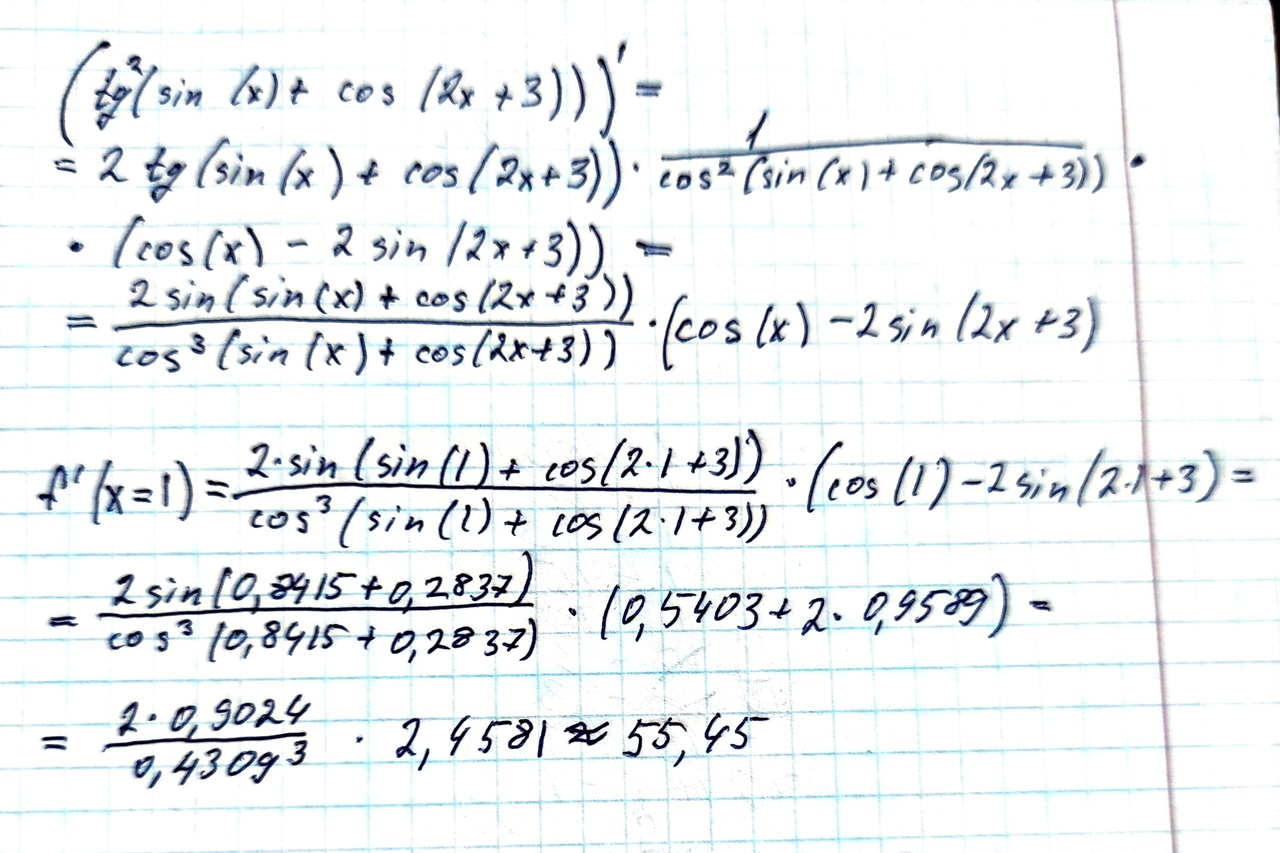

## Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [8]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [9]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [10]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

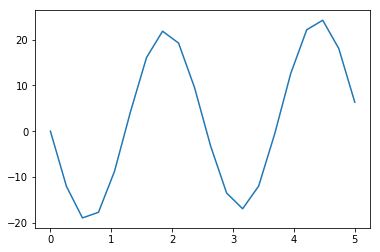

In [11]:
plt.plot(x, fx)
plt.show()

In [12]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [13]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(error, bounds, seed=42)
print(result)
print('Параметры a, b - {}'.format(result.x))

     fun: 1.5130289208187264e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])
Параметры a, b - [ 3.  -2.5]


## Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [14]:
my_items = list(range(20))
items = np.array(choices(my_items, k=1000*50))
items.shape = 50, 1000
means = np.mean(items, axis=0)

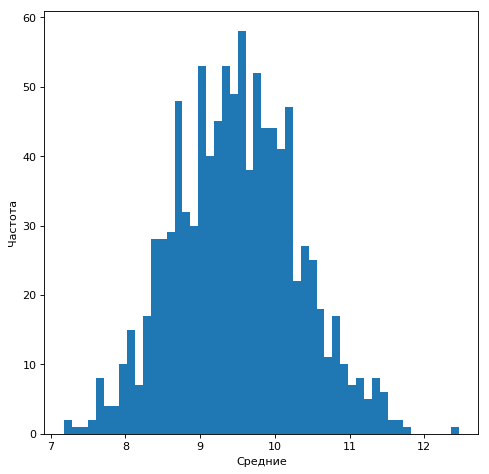

In [15]:
fig = plt.figure(figsize=(7, 7), dpi=80)
ax = fig.add_subplot(111)
x_1 = ax.hist(means, bins=50)
xl = ax.set_xlabel('Средние')
yl = ax.set_ylabel('Частота')

## Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [16]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [17]:
w,v = LA.eig(m)
print(f'Собственные значения матрицы - {w[0]} и {w[1]}.')
print(f'Собственные вектора матрицы - {v[0]} и {v[1]}, соответственно.')

Собственные значения матрицы - 3.0000000000000004 и -0.9999999999999996.
Собственные вектора матрицы - [ 0.89442719 -0.89442719] и [0.4472136 0.4472136], соответственно.


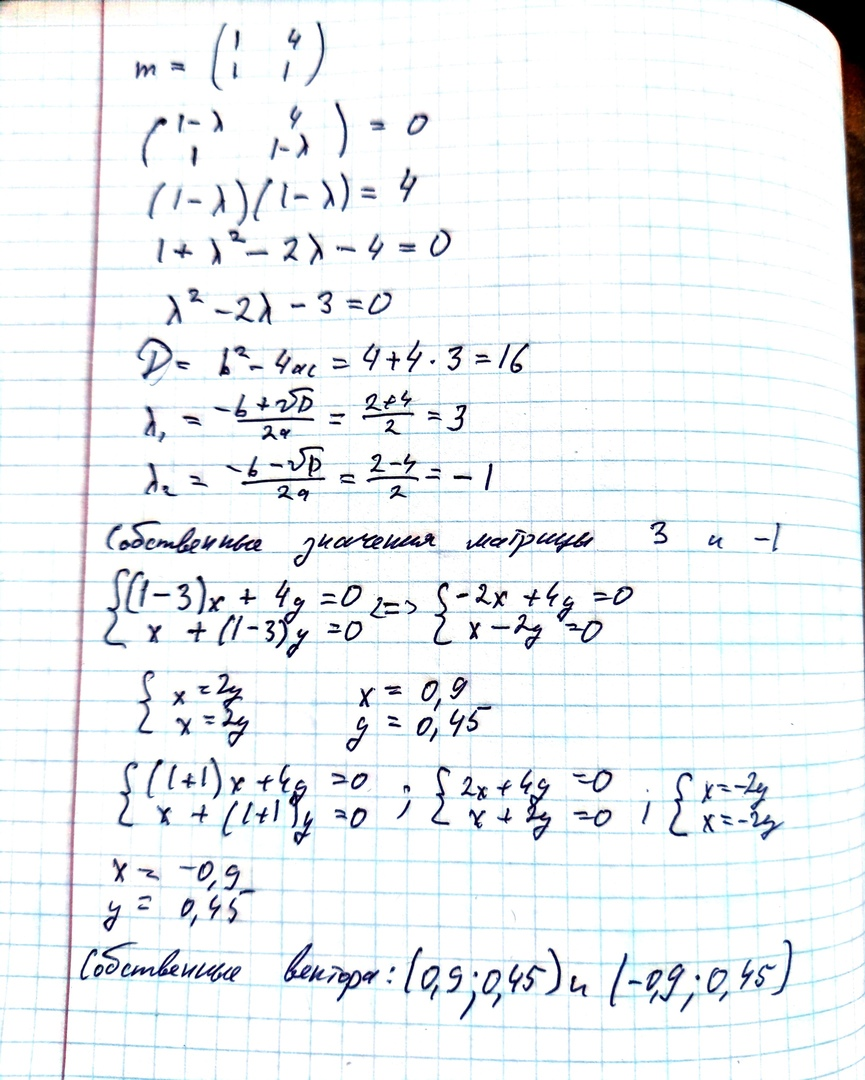